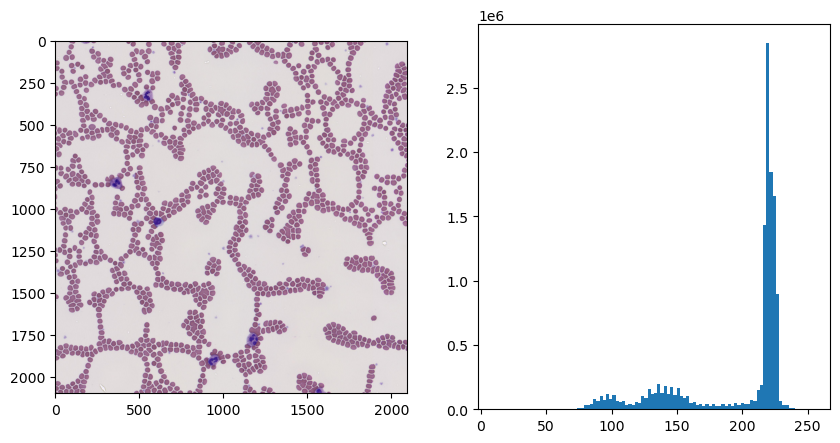

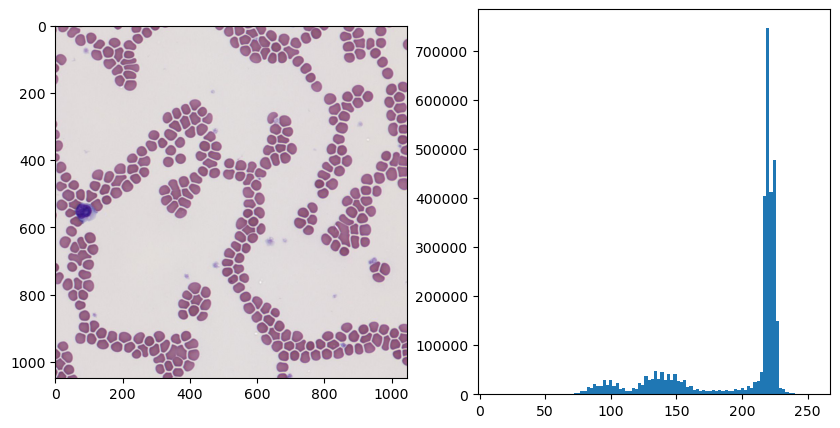

In [31]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb

image_path = r"D:\images\tnia-python-images\imagesc\2024_03_27_SOTA_segmentation\images\cell_00212.png"
label_path = r"D:\images\tnia-python-images\imagesc\2024_03_27_SOTA_segmentation\labels\cell_00212_label.tiff"

image = imread(image_path)

def show_im_and_hist(image):
    """Display an image and its histogram."""
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[1].hist(image.flatten(), bins=100)
    plt.show()

show_im_and_hist(image)

roi = np.s_[image.shape[0] // 2 - image.shape[0]//4: image.shape[0] // 2 + image.shape[0]//4,
           image.shape[1] // 2 - image.shape[1]//4: image.shape[1] // 2 + image.shape[1]//4, ...]

crop = image[roi]

show_im_and_hist(crop)

In [18]:
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation
import torch

def microsam_predict(image):
    model_type = "vit_b_lm"
    #model_type = "vit_l_histopathology"
    print(f"Using model type: {model_type}")

    device = "cuda" if torch.cuda.is_available() else "cpu" # the device/GPU used for training
    # Step 1: Get the 'predictor' and 'segmenter' to perform automatic instance segmentation.
    predictor, segmenter = get_predictor_and_segmenter(
        model_type=model_type, # choice of the Segment Anything model
        #checkpoint=best_checkpoint,  # overwrite to pass your own finetuned model.
        device=device,  # the device to run the model inference.
        is_tiled = False #(tile_shape is not None),  # whether the model is tiled or not.
    )

    # Step 2: Get the instance segmentation for the given image.
    prediction = automatic_instance_segmentation(
        predictor=predictor,  # the predictor for the Segment Anything model.
        segmenter=segmenter,  # the segmenter class responsible for generating predictions.
        input_path=image,
        ndim=2,
    )

    return prediction

Using model type: vit_b_lm


Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]


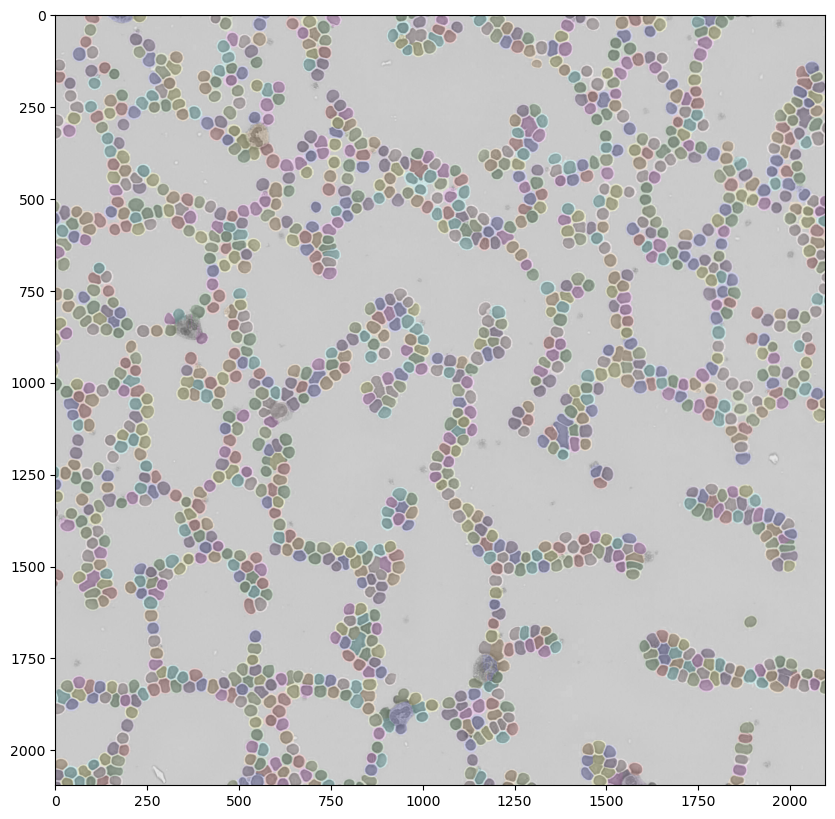

In [19]:
result1 = microsam_predict(image)

overlay1 = label2rgb(result1, image=image, bg_label=0, alpha=0.1)
plt.figure(figsize=(10, 10))
plt.imshow(overlay1)

In [20]:
help(label2rgb)

Help on function label2rgb in module skimage.color.colorlabel:

label2rgb(label, image=None, colors=None, alpha=0.3, bg_label=0, bg_color=(0, 0, 0), image_alpha=1, kind='overlay', *, saturation=0, channel_axis=-1)
    Return an RGB image where color-coded labels are painted over the image.
    
    Parameters
    ----------
    label : ndarray
        Integer array of labels with the same shape as `image`.
    image : ndarray, optional
        Image used as underlay for labels. It should have the same shape as
        `labels`, optionally with an additional RGB (channels) axis. If `image`
        is an RGB image, it is converted to grayscale before coloring.
    colors : list, optional
        List of colors. If the number of labels exceeds the number of colors,
        then the colors are cycled.
    alpha : float [0, 1], optional
        Opacity of colorized labels. Ignored if image is `None`.
    bg_label : int, optional
        Label that's treated as the background. If `bg_label` 

Using model type: vit_b_lm


Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:00<00:00, 14.94it/s]


Text(0.5, 1.0, 'Crop then segment')

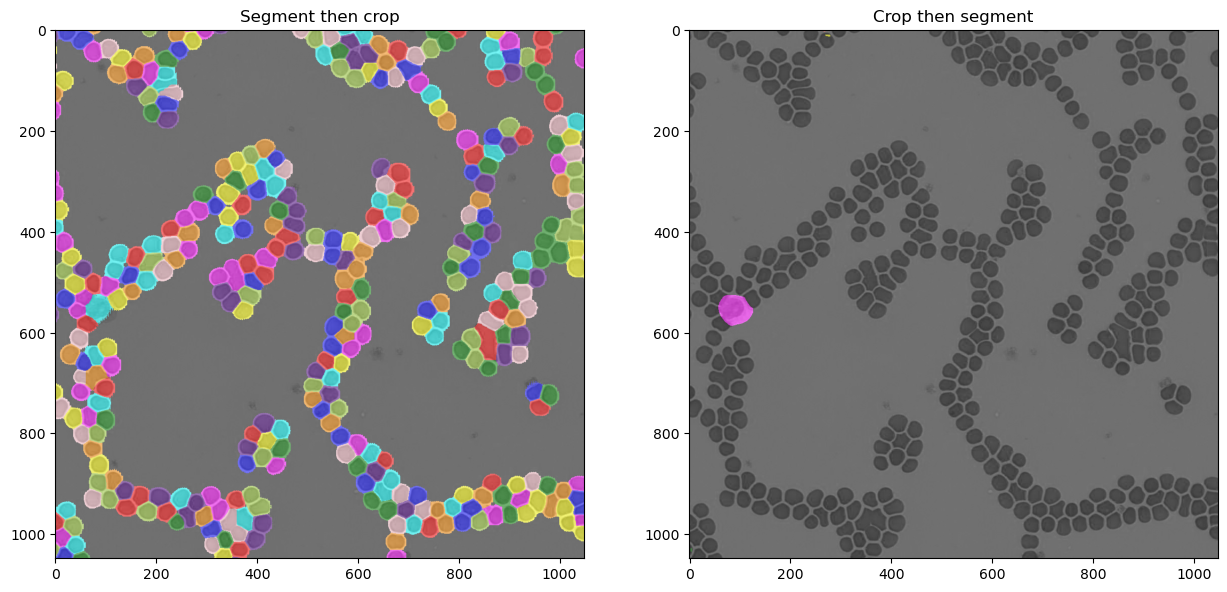

In [ ]:
result2 = microsam_predict(crop)

overlay1 = label2rgb(result1[roi], image=crop, bg_label=0, alpha=0.5)
overlay2 = label2rgb(result2, image=crop, bg_label=0, alpha=0.5)

# make 2 by 1 subplot
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(overlay1)
plt.title("Segment then crop")
plt.subplot(1, 2, 2)
plt.imshow(overlay2)
plt.title("Crop then segment")

In [22]:
print(overlay1.dtype, overlay1.min(), overlay1.max())

float64 0.20588235294117646 1.0


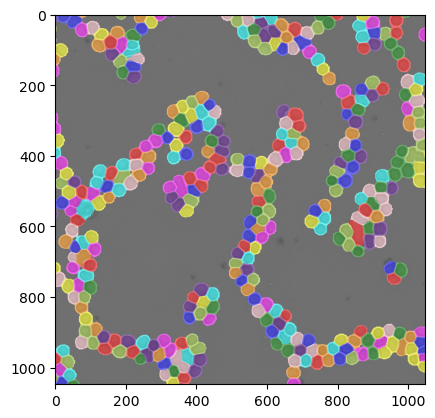

In [23]:
overlay18b = (255*overlay1).astype(np.uint8)

plt.imshow(overlay18b)

In [24]:
overlay18b.dtype, overlay18b.min(), overlay18b.max()

(dtype('uint8'), 52, 255)